# 1.0 Introduction

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
link = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [27]:
data.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [28]:
data_country = data.iloc[:,[1,7,8,9,10,11,12,13]].copy()
data_country.columns = ['country','date', 'retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential']
data_country.date = pd.to_datetime(data_country.date)
data_country.index = data_country.date
data_country.drop(labels = 'date', axis=1, inplace=True)
data_country.head()

,country,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,
2020-02-15,United Arab Emirates,0.0,4.0,5.0,0.0,2.0,1.0
2020-02-16,United Arab Emirates,1.0,4.0,4.0,1.0,2.0,1.0
2020-02-17,United Arab Emirates,-1.0,1.0,5.0,1.0,2.0,1.0
2020-02-18,United Arab Emirates,-2.0,1.0,5.0,0.0,2.0,1.0
2020-02-19,United Arab Emirates,-2.0,0.0,4.0,-1.0,2.0,1.0


In [29]:
data_country.groupby(by=[data_country.index,"country"]).mean().unstack()["residential"][['United States','Canada','Mexico']]

country,United States,Canada,Mexico
date,,,
2020-02-15,-0.550773,-0.250000,-1.212121
2020-02-16,-0.662211,-1.917808,-0.757576
2020-02-17,4.363946,8.134328,-2.212121
2020-02-18,0.794598,1.341176,-1.787879
2020-02-19,0.177349,0.810651,-1.484848
...,...,...,...
2020-09-23,5.736088,6.632653,13.242424
2020-09-24,6.020567,5.723077,13.787879
2020-09-25,5.557889,5.587302,13.484848


There isn't china's date

In [30]:
plt.style.use('fivethirtyeight')

In [31]:
data_nafta = data_country.groupby(by=[data_country.index,"country"]).mean().unstack()["residential"][['United States','Canada','Mexico']].copy()

In [32]:
min_mexico = data_nafta.loc[data_nafta.Mexico==data_nafta.Mexico.min()].copy()
min_canada = data_nafta.loc[data_nafta.Canada==data_nafta.Canada.min()].copy()
min_usa = data_nafta.loc[data_nafta["United States"]==data_nafta["United States"].min()].copy()
print(min_mexico)
print(min_canada)
print(min_usa)

country     United States    Canada    Mexico
date                                         
2020-02-17       4.363946  8.134328 -2.212121
country     United States    Canada    Mexico
date                                         
2020-09-06       0.273548 -2.275362  7.454545
country     United States    Canada    Mexico
date                                         
2020-02-29      -1.975027 -0.922222 -0.757576


In [33]:
max_mexico = data_nafta.loc[data_nafta.Mexico==data_nafta.Mexico.max()].copy()
max_canada = data_nafta.loc[data_nafta.Canada==data_nafta.Canada.max()].copy()
max_usa = data_nafta.loc[data_nafta["United States"]==data_nafta["United States"].max()].copy()
print(max_mexico)
print(max_canada)
print(max_usa)

country     United States    Canada     Mexico
date                                          
2020-04-10       21.83233  32.09589  28.545455
country     United States    Canada     Mexico
date                                          
2020-04-10       21.83233  32.09589  28.545455
country     United States    Canada     Mexico
date                                          
2020-04-10       21.83233  32.09589  28.545455


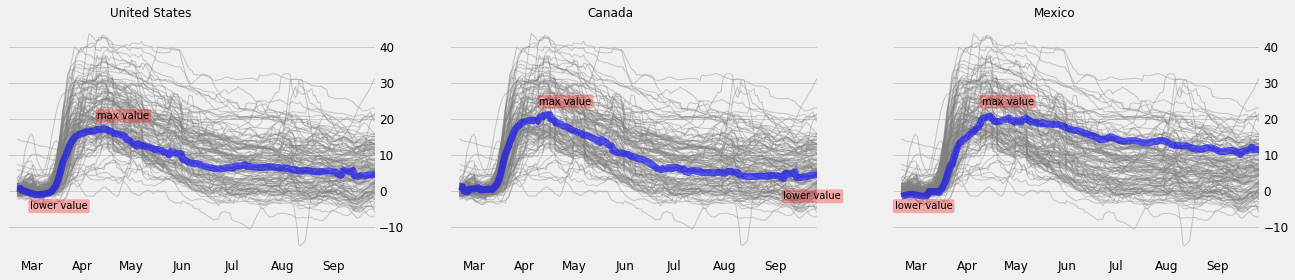

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,4))

item = "residential" #grocery, parks, transit, workplaces, retail
countrys = ['United States','Canada','Mexico']

for i,country in enumerate(countrys):
  data_country.groupby(by=[data_country.index,"country"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1, alpha=0.4, ax=ax[i])
  data_country.groupby(by=[data_country.index,"country"]).mean().unstack()[item][country].rolling(window=7).mean().plot(legend=False,color="blue",linewidth=7, alpha=0.6, ax=ax[i])
  ax[i].set_title(country,fontsize=12,ha='right')
  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")
  
  ax[i].set_xticklabels(["","Mar","Apr","May","Jun","Jul","Aug","Sep"])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)

  if (i==0) or (i==2):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

ax[0].annotate("lower value",
            xy=('2020-02-29', -1.975027), xycoords='data',
            xytext=('2020-02-29', -5), textcoords='data',
            size=10, bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3))

ax[0].annotate("max value",
            xy=('2020-04-10',  21.83233 ), xycoords='data',
            xytext=('2020-04-10',  20 ), textcoords='data',
            size=10, bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3) )

ax[1].annotate("lower value",
            xy=('2020-09-06', -2.275362), xycoords='data',
            xytext=('2020-09-06', -2.275362), textcoords='data',
            size=10,bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3) )

ax[1].annotate("max value",
            xy=('2020-04-10', 32.09589), xycoords='data',
            xytext=('2020-04-10', 24), textcoords='data',
            size=10, bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3) )

ax[2].annotate("lower value",
            xy=('2020-02-17', -2.212121), xycoords='data',
            xytext=('2020-02-17', -5), textcoords='data',
            size=10, bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3) )

ax[2].annotate("max value",
            xy=('2020-04-10', 28.545455), xycoords='data',
            xytext=('2020-04-10', 24), textcoords='data',
            size=10, bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3) )

plt.savefig("nafta.png",dpi=300)
plt.show()